# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load The Data](#Load_The_Data)
  * [Explore The Data](#Explore_The_Data)
  * [Feature correlation heatmap](#Feature_correlation_heatmap')
  * [Summary](#Summary)


## Introduction<a id='Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling resort revenue. The data you started with contained some ticket price values, but with a number of missing values that led to several rows being dropped completely. You also had two kinds of ticket price. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional US state population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the adult weekend ticket price for ski resorts.

## Imports<a id='Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## Load The Data<a id='Load_The_Data'></a>

### Credit Card Customer Attrition data<a id='3.4.1_CCAttr_data'></a>

In [2]:
ccattr_data = pd.read_csv('../data/ccattr_data_cleaned.csv')

In [3]:
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [4]:
ccattr_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Explore The Data<a id='Explore_The_Data'></a>

**Encoding categorical variables**

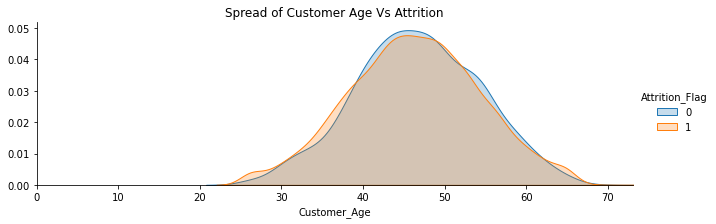

In [5]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Customer_Age",shade= True)
facet.set(xlim=(0, ccattr_data["Customer_Age"].max()))
facet.set(title="Spread of Customer Age Vs Attrition")
facet.add_legend()

There is no difference in Age of attrited and existing customers. it doesnt look to have any relation with attrition. Majority of the customer gae is between 35 to 55.

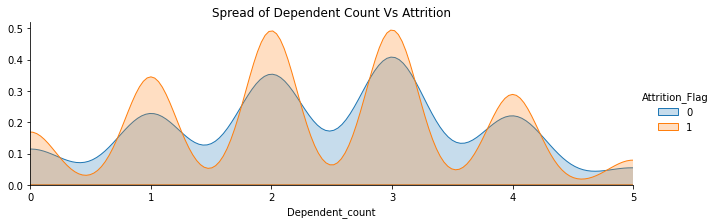

In [6]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Dependent_count",shade= True)
facet.set(xlim=(0, ccattr_data["Dependent_count"].max()))
facet.set(title="Spread of Dependent Count Vs Attrition")
facet.add_legend()

Customer with 2 and 3 dependent attrited more, followed with 1 and 4.Means customer with o dependents or more than 5 are less probable of churning.

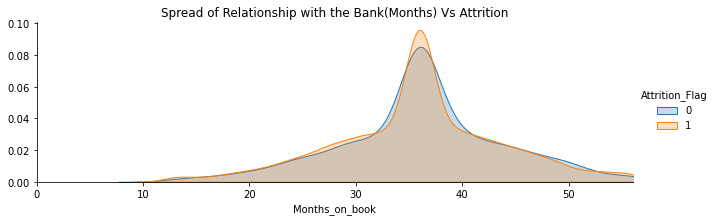

In [7]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Months_on_book",shade= True)
facet.set(xlim=(0, ccattr_data["Months_on_book"].max()))
facet.set(title="Spread of Relationship with the Bank(Months) Vs Attrition")
facet.add_legend()

Average period of relationship with the bank is ~35 to ~40.

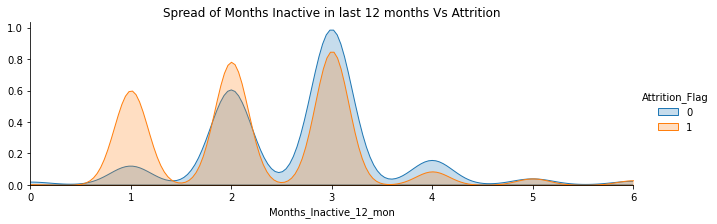

In [8]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Months_Inactive_12_mon",shade= True)
facet.set(xlim=(0, ccattr_data["Months_Inactive_12_mon"].max()))
facet.set(title="Spread of Months Inactive in last 12 months Vs Attrition")
facet.add_legend()

The customer were inactive for 3 months,are more likely to be churned, followed with 2 months. Surprise is more than 4 months are very less and their attrition rate is also very low. so target customers are those who stayed inactive for 2 to 3 months.

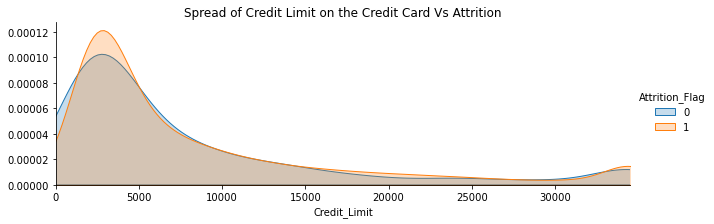

In [9]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Credit_Limit",shade= True)
facet.set(xlim=(0, ccattr_data["Credit_Limit"].max()))
facet.set(title="Spread of Credit Limit on the Credit Card Vs Attrition")
facet.add_legend()

Customer with lower credit limit attried more.

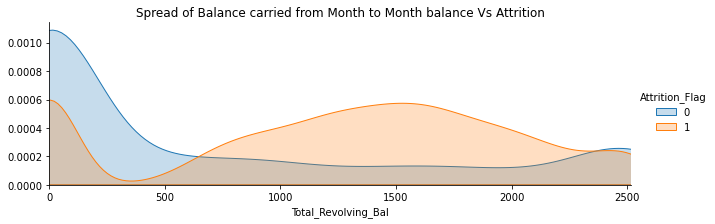

In [10]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Total_Revolving_Bal",shade= True)
facet.set(xlim=(0, ccattr_data["Total_Revolving_Bal"].max()))
facet.set(title="Spread of Balance carried from Month to Month balance Vs Attrition")
facet.add_legend()

There appears to be strange behaviour of customer. Customer with relvoving balance more than 500 attrited more.And attrition rate peaks betweem balance beyween 1000 to 2000.

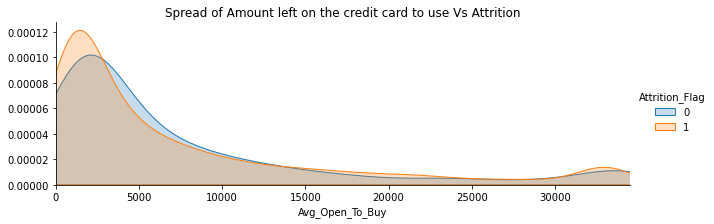

In [11]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Avg_Open_To_Buy",shade= True)
facet.set(xlim=(0, ccattr_data["Avg_Open_To_Buy"].max()))
facet.set(title="Spread of Amount left on the credit card to use Vs Attrition")
facet.add_legend()

There are more customer with less amount, and potentially attrtied.

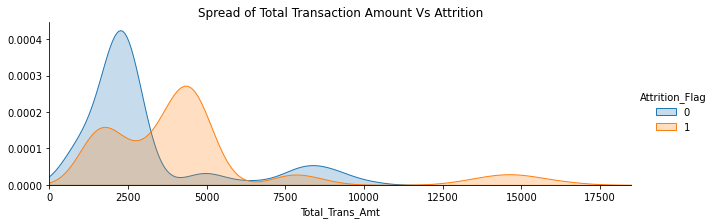

In [12]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Total_Trans_Amt",shade= True)
facet.set(xlim=(0, ccattr_data["Total_Trans_Amt"].max()))
facet.set(title="Spread of Total Transaction Amount Vs Attrition")
facet.add_legend()

Customer with Transaction amount under 5000 are attried more.Customers with lesser transaction amount spend and low change in transaction_spend_Q1_Q4 were more likely to attrite. 

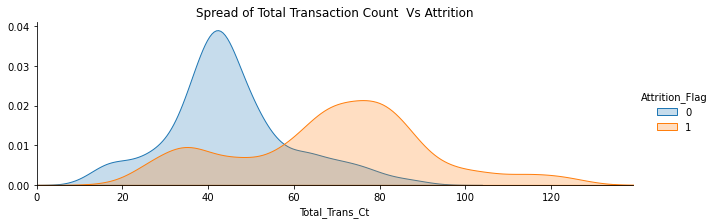

In [13]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Total_Trans_Ct",shade= True)
facet.set(xlim=(0, ccattr_data["Total_Trans_Ct"].max()))
facet.set(title="Spread of Total Transaction Count  Vs Attrition")
facet.add_legend()

Customer with transaction count between ~60 to ~90 attried more.The customers with low number of transactions and low change in number of transactions between Q1 and Q4 attrited.

**Univariate analysis of continous variable**

In [14]:
def hist_plot(ccdata):
 # univariate analysis of continous variable to check spread, cmean and median.
    Title=ccdata.name.upper()
    fig,(ax_dis)=plt.subplots(figsize=(8, 5))
   
    mean=ccdata.mean()
    median=ccdata.median()
    sns.set_theme(style="ticks")
    fig.suptitle("Spread of Data: "+ Title  , fontsize=18, fontweight='bold')
    sns.histplot(ccdata,kde=False,color='lightgrey',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='b', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median})

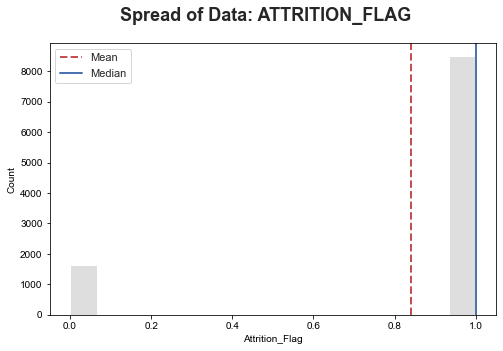

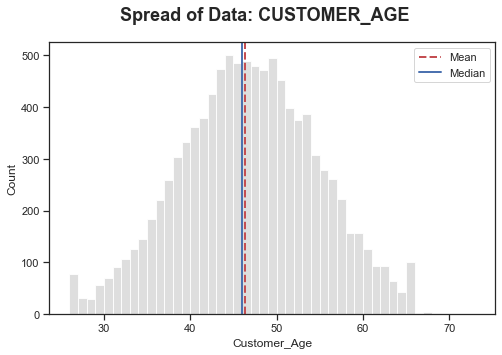

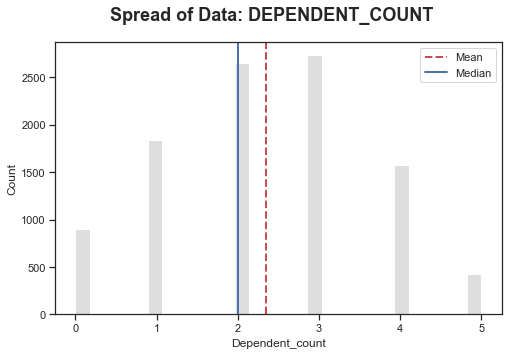

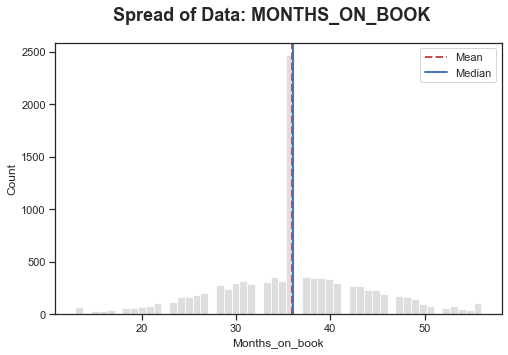

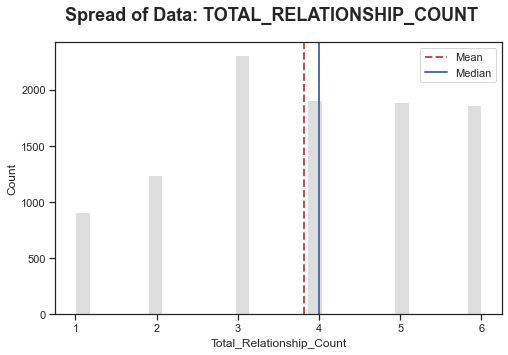

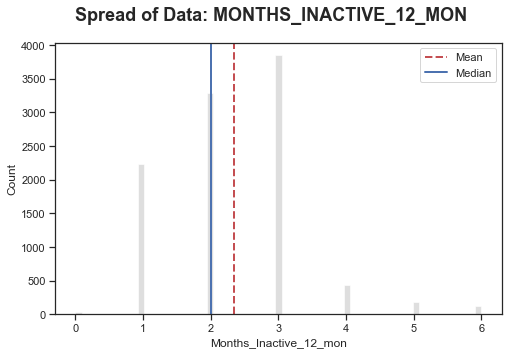

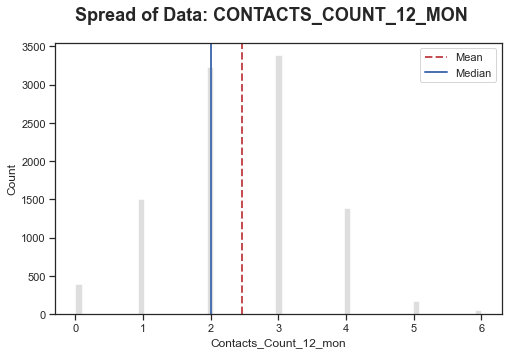

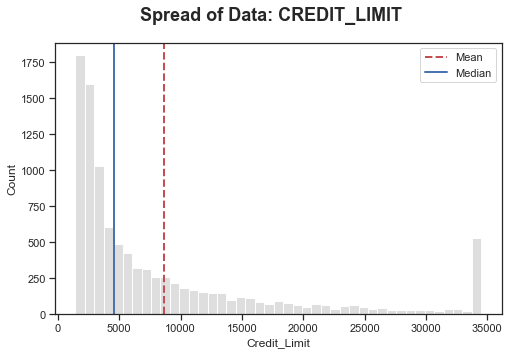

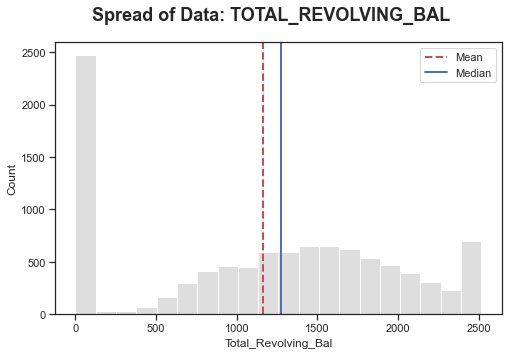

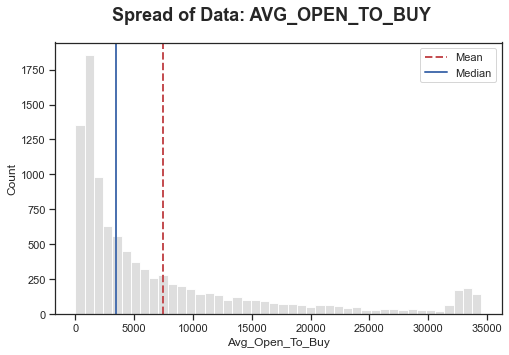

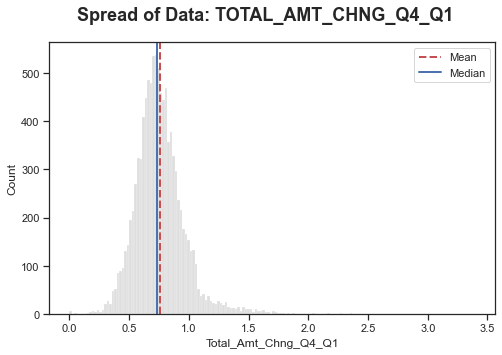

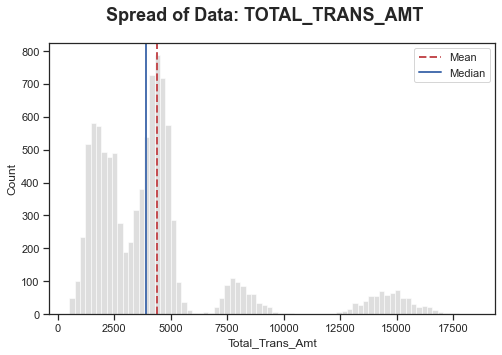

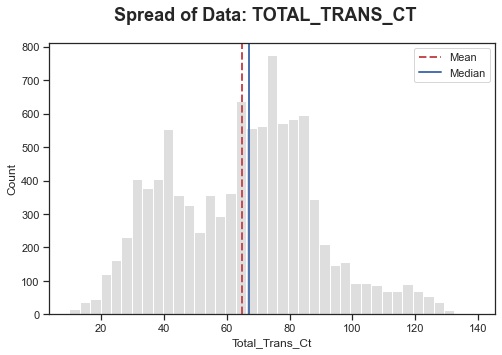

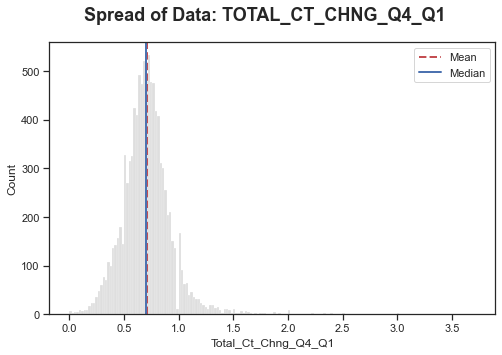

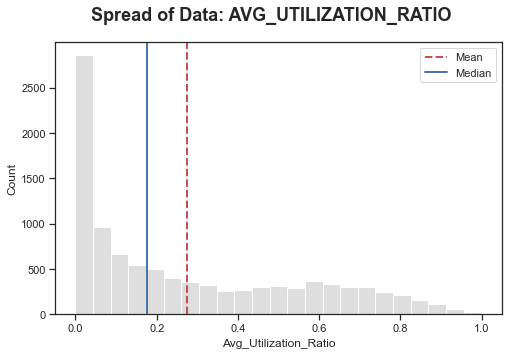

In [15]:
#numerical columns for checking the spread
list_col=  ccattr_data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    hist_plot(ccattr_data[list_col[i]])

* Relationship with the bank has maximum distribution around ~35-36.Most customer have credit card for this long.
* Credit card limit showed surprise peak at 35000,this appears to be default value, Customers above 25000 need to be investigated further.
* Total Revolving bal(balance carried over from one month to the next)  appears to have different distribution with many customers with ~0 revolving balance and then almost normal distribution and with surprise peak at 2500.
* Average open to buy (amount left on the credit card to use )has same distribution as Credit card limit.
* Total Amt change:There are some 3.5 ratio of total amount change from Q4 to Q1,this customers which needs to be investigated more.
* Total transaction Amount has different distribution with data between 0 -2500 , 2500-5000, 750-10000 and then 12500-17500.

 ## Feature correlation heatmap<a id='Feature_correlation_heatmap'></a>

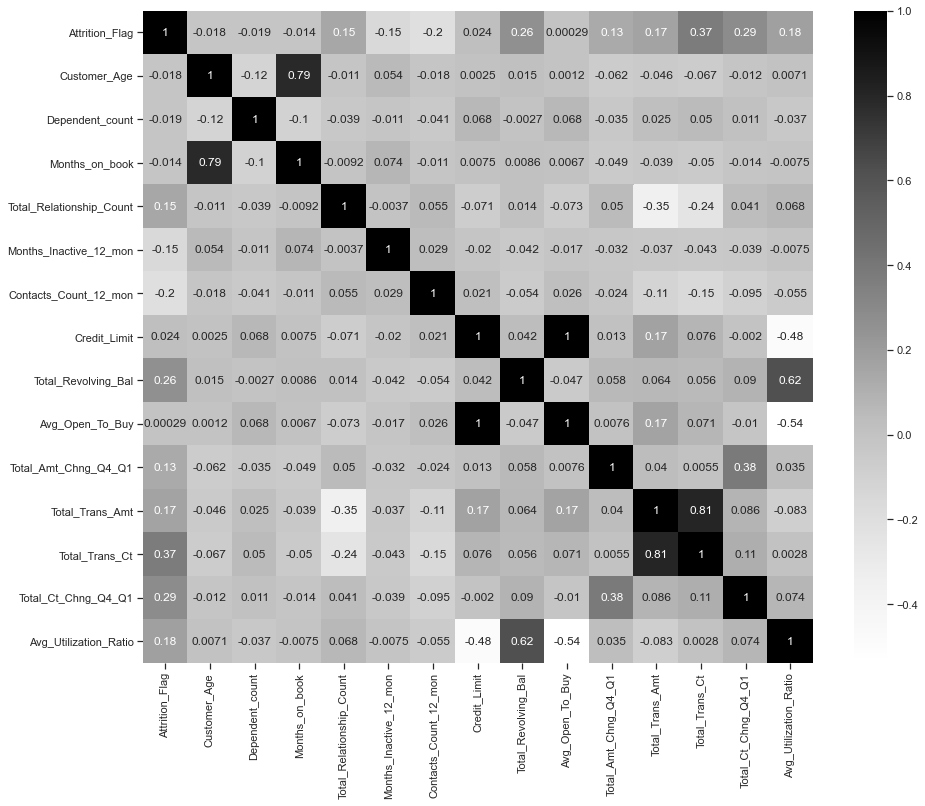

In [16]:
plt.subplots(figsize=(15,12))
sns.heatmap(ccattr_data.corr(), cmap="Greys",annot=True)
plt.show()

* Customer age and Time frame with bank are highly correlated.
* Credit limit and Avg utlization ratio(how much of the available credit the customer spent) has some negative correlation.
* Total revolving balance (balance that carries over from one month to the next and average utlization (how much of the available credit the customer spent) are positively correlated.As expected.
* Average opening balance is negatively correlated to avg utlization ratio.
* There is very little correlation between total transfer amount and credit limit
* As expected there is very high correlation total transfer amount and total transfer count.
* Credit limit and Average open to buy is fully correlated, we can drop one of them.
* It is also logical that Total_Trans_Amt is correlated to Total_Amt_Chng_Q4_Q1,total ct_change_q4_Q1.These features appears to be derived from Total_Trans_Amt. We can drop one of these columns

In [17]:
## plot stacked bar chart against 
def stacked_plot(x):
    sns.set_palette(sns.color_palette("tab20", 2))
    crtab = pd.crosstab(x,ccattr_data['Attrition_Flag'],margins=True)
    display(crtab)
    barplot = pd.crosstab(x,ccattr_data['Attrition_Flag'],normalize='index')
    barplot.plot(kind='bar',stacked=True,figsize=(5,5))
    plt.xticks(rotation=360)
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left",title=" ",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) 
    plt.show()

Attrition_Flag,0,1,All
Attrition_Flag,,,
0,1627,0,1627
1,0,8500,8500
All,1627,8500,10127


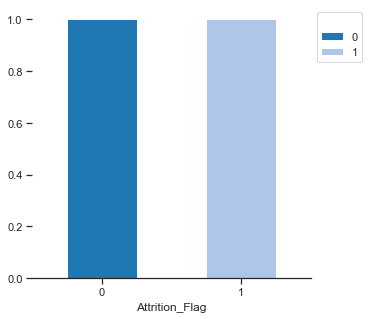

Attrition_Flag,0,1,All
Gender,,,
F,930,4428,5358
M,697,4072,4769
All,1627,8500,10127


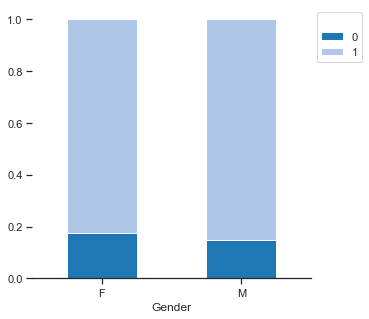

Attrition_Flag,0,1,All
Education_Level,,,
College,154,859,1013
Doctorate,95,356,451
Graduate,743,3904,4647
High School,306,1707,2013
Post-Graduate,92,424,516
Uneducated,237,1250,1487
All,1627,8500,10127


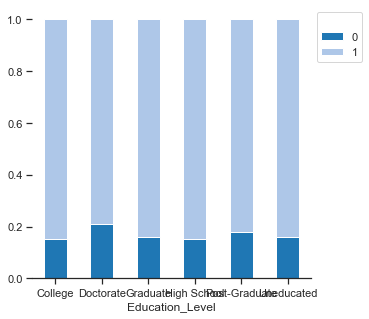

Attrition_Flag,0,1,All
Marital_Status,,,
Divorced,121,627,748
Married,838,4598,5436
Single,668,3275,3943
All,1627,8500,10127


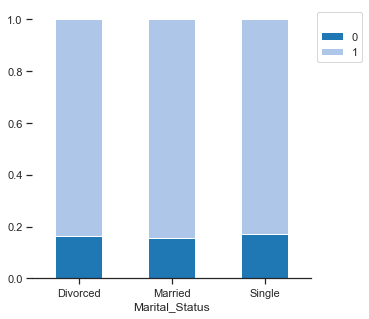

Attrition_Flag,0,1,All
Income_Category,,,
$120K +,126,601,727
$40K - $60K,271,1519,1790
$60K - $80K,189,1213,1402
$80K - $120K,242,1293,1535
Less than $40K,799,3874,4673
All,1627,8500,10127


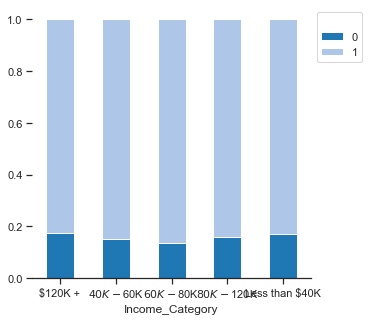

Attrition_Flag,0,1,All
Card_Category,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
All,1627,8500,10127


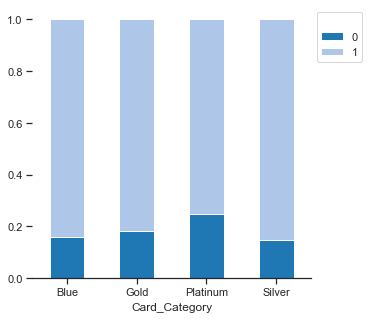

Attrition_Flag,0,1,All
Dependent_count,,,
0,135,769,904
1,269,1569,1838
2,417,2238,2655
3,482,2250,2732
4,260,1314,1574
5,64,360,424
All,1627,8500,10127


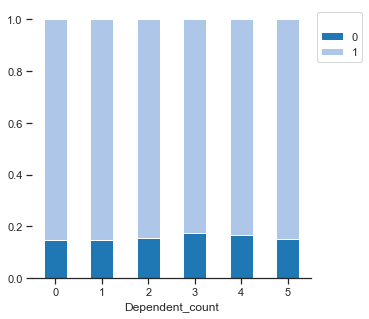

Attrition_Flag,0,1,All
Total_Relationship_Count,,,
1,233,677,910
2,346,897,1243
3,400,1905,2305
4,225,1687,1912
5,227,1664,1891
6,196,1670,1866
All,1627,8500,10127


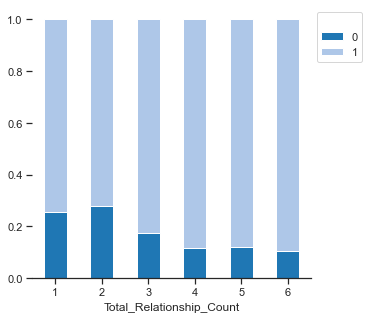

Attrition_Flag,0,1,All
Months_Inactive_12_mon,,,
0,15,14,29
1,100,2133,2233
2,505,2777,3282
3,826,3020,3846
4,130,305,435
5,32,146,178
6,19,105,124
All,1627,8500,10127


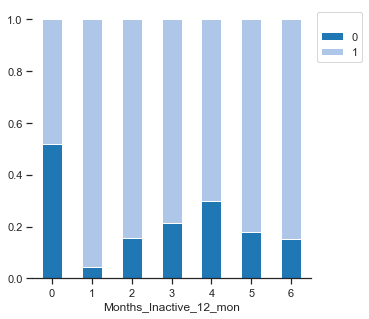

Attrition_Flag,0,1,All
Contacts_Count_12_mon,,,
0,7,392,399
1,108,1391,1499
2,403,2824,3227
3,681,2699,3380
4,315,1077,1392
5,59,117,176
6,54,0,54
All,1627,8500,10127


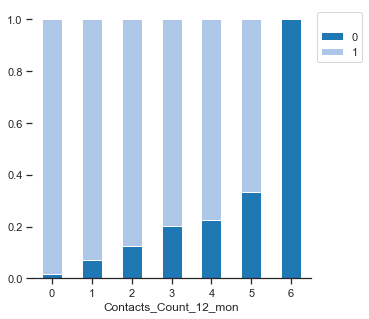

In [18]:
cat_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
for x, cols in enumerate(cat_cols):
       stacked_plot(ccattr_data[cols])

* Though Female customer attrited more compared to male, but not much difference.
* Customers who were doctorate or postgraduate attrited most.Graduate and high schoolers stayed.
* Customers who were Divorced attrited more.
* Customers who earned more than 120k attrited more.
* Customers with Blue card attrited more. 
* Customer with 2 or 3 dependent attrited more.
* Customer having 2 or 3 bank product attrited more compared to other customers with more bank products.
* Customers who were never inactive attrited most.we can't be sure about this we have less, only 29 samples.
* Customer who were contacted most in last 12 month attrited.Good to know, what made cuastomer to react this way.

## Summary<a id='Summary'></a>

Customer age and Time frame with bank are highly correlated.Though Female customer attrited more compared to male, but not much difference.Customers who were doctorate or postgraduate attrited most.Graduate and high schoolers stayed.Onthe contrary Customers who earned more than 120k attrited more. As expected there is very high correlation total transfer amount and total transfer count.Customer having 2 or 3 bank product attrited more compared to other customers with more bank products.Total transaction Amount has different distribution with data between 0 -2500 , 2500-5000, 750-10000 and then 12500-17500. To a surprise Customer who were contacted most in last 12 month attrited.

In [19]:
ccattr_data.head().T

,0,1,2,3,4
Attrition_Flag,1,1,1,1,1
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Married,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21
Total_Relationship_Count,5,6,4,3,5


In [20]:
# Save the data 

datapath = '../data'
#save_file(ski_data, 'ski_data_step3_features.csv', datapath)
# modified per suggestion by Mentor
datapath_ccattr_step3 = os.path.join(datapath, 'ccattr_step3_features.csv')
if not os.path.exists(datapath_ccattr_step3):
    ccattr_data.to_csv(datapath_ccattr_step3, index=False)